# NumMod, Skoltech, Term 3, 2021

## Problem Set 1

### Modeling a Cantilever Beam

Consider a beam fixed at one end (called a [cantilever](http://en.wikipedia.org/wiki/Cantilever) beam) as shown here:
<img src='fig/beam_basic.png'>

<a id="eq"></a>
Its deflection from the equilibrium position is described by the deflection $u = u(x)$ which satisfies the boundary-value problem for the [Euler-Bernoulli equation](http://en.wikipedia.org/wiki/Euler%E2%80%93Bernoulli_beam_theory)

\begin{equation}
\label{eq:E-B_eq.} \tag{1}
(EIu'')'' = 0 \qquad \qquad \quad \\
u(0)=0 \qquad u'(0)=0 \qquad \qquad \\
u''(L)=0 \qquad (EIu'')'(L)=P \qquad \qquad \quad\\
\end{equation}

where $P$ is the force applied to the beam’s end, $E$ is the (constant) elastic modulus (a material’s property) and $I$ is the second moment of the area of the cross-section. If the cross-section is a rectangle with height $~H = H(x)$ and the width is $W$ then  $~I = I(x) = WH(x)^3/12$ (see more details in Wikipedia under the link above).

### Proposition 1.

Assume that $~I = I(x)$ is constant.

* **(a)** \begin{equation}\label{approx_4ord}\frac{u(x − 2h) − 4u(x − h) + 6u(x) − 4u(x + h) + u(x + 2h)}{h^4}\end{equation}  approximates  $u''''(x)$ with the second order.

* **(b)** Consider a grid $~h = L/N~$,  $~x_i = hi~$,  $~i = 0,..., N + 2~$. The last line of system ([1](#eq)) can be approximated by
\begin{equation}
u(L+h)−2 u(L)+u(L−h) = 0 \\
u(L+2h)−2 u(L+h)+2u(L−h)-u(L-2h) = 2 h^3 P/(EI).
\end{equation}

### Problem 1 (40pt)

Assume that $~I = I(x)$ is constant and the mesh is chosen as it is described in Proposition 1.

* **(5pt)** Prove part (a) of Proposition 1.


* **(5pt)** Formulate the finite difference problem approximating system ([1](#eq)) with the second order.


* **(10pt)** Write a code that implements this finite difference problem by constructing an $(N + 4) × (N + 4)$ matrix $A_h$ and the right-hand side vector $b_h$.


* **(10pt)** For the given parameters $E = 2.5\, \text{GPa}$, $H = 7\,\text{mm}$, $W = 3\,\text{mm}$, $L = 25\, \text{cm}$, $P = m \cdot g, m = 200\,\text{g}, g = 9810\,\text{mm}/\text{s}^2$, $h = L/20$ use your code to compute the solution $u_h = (u_h(−h), . . . , u_h(L + 2h))$. What is the computed deflection of the right end, $u_h(L)$?


* **(5pt)** Find the solution $u$ in the analytic form. Compare $~u(L)~$ with $~u_h(L)~$ for $~h = L/25,L/50,L/100~$. As you decrease $~h~$ by a factor or 2, by what factor does the difference $~|u_h(L) − u(L)|~$ decrease?


* **(5pt)** Compute $~\sigma _{\min}(A_h)~$ and $~\sigma _{\max}(A_h)~$ for $~h = L/25, L/50, L/100$. As you decrease $~h~$ by a factor or 2, by what factor does $\operatorname{cond}(A_h)$ increase? (Alternatively, compute $\lambda _{\min}(A_h)$ and $\lambda _{\max}(A_h)$ and comment on how $\lambda _{\max}(A_h)$/$\lambda _{\min}(A_h)$ increases.) Can you find, approximately, for what $h$ your code computes the value $~|u_h(L)−u(L)|~$ most accurately? Explain why your code’s answers are worse if $~h~$ is less than this value and if $~h~$ is larger than this value.

---

## Solution of Problem 1

* **(5pt)** Prove part (a) of Proposition 1.


Let's write out the Taylor of series with the residual term in the form of Lagrange to expand function values at grid nodes:


\begin{equation}
u(x − 2h) = u(x) - 2hu'(x) + 2h^2u''(x) - \frac{8h^3}{6} u'''(x) + \frac{16h^4}{24}u''''(x) - \frac{32h^5}{5!}u^{(5)}(x) + \frac{64h^6}{6!}u^{(6)}(\xi_1)
\end{equation}

$$u(x + 2h) = u(x) + 2hu'(x) + 2h^2u''(x) + \frac{8h^3}{6} u'''(x) + \frac{16h^4}{24}u''''(x) + \frac{32h^5}{5!}u^{(5)}(x) + \frac{64h^6}{6!}u^{(6)}(\xi_2)$$


$$u(x - h) = u(x) - hu'(x) + 0.5h^2u''(x) - \frac{h^3}{6}u'''(x) + \frac{h^4}{24} u''''(x) - \frac{h^5}{5!}u^{(5)}(x) + \frac{h^6}{6!}u^{(6)}(\xi_3)$$


$$u(x + h) = u(x) + hu'(x) + 0.5h^2u''(x) + \frac{h^3}{6}u'''(x) + \frac{h^4}{24} u''''(x) + \frac{h^5}{5!}u^{(5)}(x) + \frac{h^6}{6!}u^{(6)}(\xi_4)$$


where $\xi_{i}$ are points in the $2h$ interval around the point $x$.

Summing up:


$$u(x + 2h) + u(x − 2h) = 2u(x) + 4h^2u''(x) + \frac{4h^4}{3}u''''(x) + \frac{64h^6}{6!}(u^{(6)}(\xi_1) + u^{(6)}(\xi_2))$$


$$
u(x + h) + u(x - h) = 2u(x) + h^2u''(x) + \frac{h^4}{12} u''''(x) + \frac{h^6}{6!}(u^{(6)}(\xi_3) + u^{(6)}(\xi_4))
$$

Choose the multiplier to cancel out second derivative:

$$
u(x + 2h) + u(x − 2h) - 4(u(x + h) + u(x - h)) = -6u(x) + h^4u''''(x) + O(h^6)
$$

Finally:

$$
h^4u''''(x) =  u(x + 2h) + u(x − 2h) - 4(u(x + h) + u(x - h)) + 6u(x) + O(h^6)
$$

or

$$
u''''(x) = \frac{ u(x + 2h) + u(x − 2h) - 4(u(x + h) + u(x - h)) + 6u(x)}{h^4} + O(h^2)
$$

The approximation order is the second order.

---

* **(5pt)** Formulate the finite difference problem approximating system ([1](#eq)) with the second order.


Assuming that $I = I(x)$ and $E$ are non-zero constants, first equation leads to:

$$
EIu'''' = 0
$$

$$
u''''=0
$$

Defining the grid: 
$$~h = L/N~,  ~x_i = hi~,  ~i = -1,..., N + 2~$$


Discretizing eq. 1 of the system ([1](#eq)) on this grid:

$$
u''''(x_i) = \frac{ u(x_i + 2h) + u(x_i − 2h) - 4(u(x_i + h) + u(x_i - h)) + 6u(x_i)}{h^4} + O(h^2) = 0
$$
$$
u_{i + 2} - 4u_{i + 1} + 6u_{i} - 4u_{i-1} + u_{i - 2} = 0 \quad \forall i \in \{1 \ldots N\}
$$

Boundary conditions (eq. 2-4):


$$
u(0) = u(x_0) = u_0  = 0
$$

$$
u'(0) = \frac{u(x_1) - u(x_{-1})}{2h} + O(h^2)  = 0
$$
$$
u_1 - u_{-1}  = 0
$$

$$
u''(L) = u_{N + 1} − 2u_N + u_{N - 1}= 0
$$


$$
u_{N + 2} −2 u_{N + 1} + 2u_{N - 1} - u_{N - 2} = 2 h^3 P/(EI)
$$


In matrix form system of equation will be written as:

$$
\begin{pmatrix}
1 & -4 & 6 & -4 & 1 & 0 & \ldots \\
0 & 1 & -4 & 6 & -4 & 1 & \ldots \\
    &&&&&\ddots\\
    &&&&&\ldots & 1 & -4 & 6 & -4 & 1\\
0 & 1 & 0 & \ldots \\
-1 & 0& 1 & \ldots \\
&&&&&\ldots & 0 & 1 & -2 & 1 & 0 \\
&&&&&\ldots & -1 & 2 & 0 & -2 & 1 \\
\end{pmatrix} \begin{pmatrix}u_{-1} \\ u_{0} \\ \vdots \\ u_{N + 1} \\ u_{N + 2}  \end{pmatrix} = \begin{pmatrix}0 \\ 0 \\ \vdots \\ 0 \\0 \\ 0 \\ 0 \\ \frac{2h^3P}{EI}  \end{pmatrix}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Write down the parameters in SI
E = 2.5 * 10**9
H = 7 * 10**(-3)
W = 3 * 10**(-3)
L = 0.25
m = 0.2
g = 9.81 
I = W * H**3 / 12
P = m*g

In [3]:
def create_A(num_points):
    A = np.zeros((num_points+4,num_points+4))
    # Fullfill the matrix
    A[0][0], A[0][2] = 1, -1
    A[1][1] = 1
    A[-2][-2],A[-2][-3],A[-2][-4] = 1,-2,1
    A[-1][-1], A[-1][-2], A[-1][-3], A[-1][-4], A[-1][-5] = 1, -2, 0, 2, -1
    # diagonals
    for k in range(2, num_points+2):
        A[k][k+2] = 1
        A[k][k+1] = -4
        A[k][k] = 6
        A[k][k-1] = -4
        A[k][k-2] = 1

    return A


def create_b(num_points, L, E, m, g):
    h = L/num_points
    b = np.zeros(num_points+4)
    b[-1] = 2*h**3*m*g/(E*I)
    return b

---


* **(10pt)** For the given parameters $E = 2.5\, \text{GPa}$, $H = 7\,\text{mm}$, $W = 3\,\text{mm}$, $L = 25\, \text{cm}$, $P = m \cdot g, m = 200\,\text{g}, g = 9810\,\text{mm}/\text{s}^2$, $h = L/20$ use your code to compute the solution $u_h = (u_h(−h), . . . , u_h(L + 2h))$. What is the computed deflection of the right end, $u_h(L)$?

In [4]:
N = 25
A = create_A(N)
b = create_b(N,L,E,m,g)

In [5]:
u = np.linalg.solve(A,b)

Text(0, 0.5, 'u')

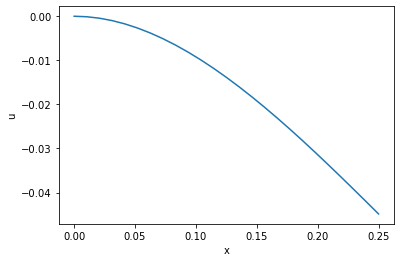

In [6]:
plt.plot(np.linspace(0,L,N), u[1:-3])
plt.xlabel('x')
plt.ylabel('u')

In [7]:
print('Computed deflection on the right end:', u[-3], 'm')

Computed deflection on the right end: -0.04770577259474836 m


---

* **(5pt)** Find the solution $u$ in the analytic form. Compare $~u(L)~$ with $~u_h(L)~$ for $~h = L/25,L/50,L/100~$. As you decrease $~h~$ by a factor or 2, by what factor does the difference $~|u_h(L) − u(L)|~$ decrease?

**Analytical solution**

Let's write down the solution of the equation in the form of a polynomial:

$$
u(x) = Ax^3 +  Bx^2 + Cx + D
$$

First two boundary conditions state that 


$$
u(0) =  D = 0
$$

$$
u'(0) = C = 0
$$

Third boundary condition gives us:


$$
u''(L) = 6AL + 2B = 0
$$

And the final boundary condition:

$$
u'''(L) = 6A = P / (EI)
$$

From here we get that 

$$
A = \frac{P}{6EI}
$$

and 

$$
B = -\frac{PL}{2EI}
$$
.

So the final solution is:

$$
u(x) = \frac{P}{6EI}x^3 -\frac{PL}{2EI}x^2 = \frac{P}{2EI} \left(\frac{x^3}{3} - Lx^2\right)
$$


In [8]:
def analytical_u(x, m, g , E, I, L):
    return m*g/(2*E*I) * (x**3 / 3 - L * x**2)

In [9]:
u_L_analytical = analytical_u(L, m, g, E, I, L)

errors = []
N = [25,50,100]
for i in N:
    A = create_A(i)
    b = create_b(i,L,E,m,g) 
    u_L = np.linalg.solve(A,b)[-3]
    errors=np.append(errors, abs(u_L_analytical - u_L))

Text(0, 0.5, 'Error')

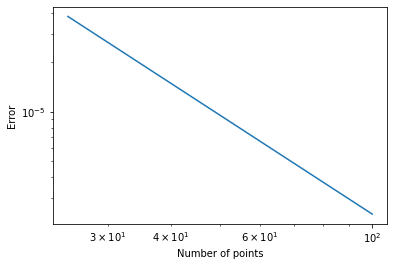

In [10]:
plt.loglog(N, errors)
plt.xlabel("Number of points")
plt.ylabel("Error")

In [11]:
print('Decrease factor of errors:', errors[0] / errors[1], errors[1] / errors[2])

Decrease factor of errors: 4.000000659504266 4.000012914659484


When decreasing $h$ by a factor of 2 - the error is decreased by 4 $\rightarrow$ second order of convergence.

---

* **(5pt)** Compute $~\sigma _{\min}(A_h)~$ and $~\sigma _{\max}(A_h)~$ for $~h = L/25, L/50, L/100$. As you decrease $~h~$ by a factor or 2, by what factor does $\operatorname{cond}(A_h)$ increase? (Alternatively, compute $\lambda _{\min}(A_h)$ and $\lambda _{\max}(A_h)$ and comment on how $\lambda _{\max}(A_h)$/$\lambda _{\min}(A_h)$ increases.) Can you find, approximately, for what $h$ your code computes the value $~|u_h(L)−u(L)|~$ most accurately? Explain why your code’s answers are worse if $~h~$ is less than this value and if $~h~$ is larger than this value.

In [12]:
def compute_condition_number(A):
    s_vals = np.linalg.svd(A, compute_uv=False)
    s_max, s_min = np.max(s_vals), np.min(s_vals)
    return s_max / s_min

In [13]:
N = [25,50,100]
cond_numbers = []
for i in N:
    A = create_A(i)
    sigmas = np.linalg.svd(A,compute_uv=False)
    sigma_max, sigma_min = np.max(sigmas), np.min(sigmas)
    cond_numbers.append(sigma_max/sigma_min)

Text(0, 0.5, '$cond(A_N)$')

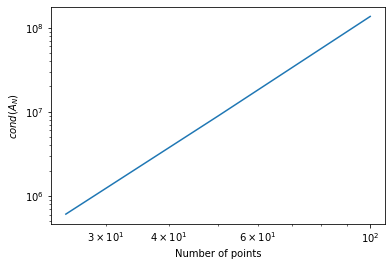

In [14]:
plt.loglog(N, cond_numbers)
plt.xlabel("Number of points")
plt.ylabel("$cond(A_N)$")

In [15]:
print('Increase factor of condition number:', cond_numbers[1] / cond_numbers[0], cond_numbers[2] / cond_numbers[1])

Increase factor of condition number: 14.652635350801294 15.26916210460387


Condition number grows factor $\approx2^4=16$ 

In [16]:
errors = []
for i in range (5,2000,5):
    A = create_A(i)
    b = create_b(i,L,E,m,g) 
    u_L = np.linalg.solve(A,b)[-3]
    errors=np.append(errors, abs(u_L_analytical - u_L))

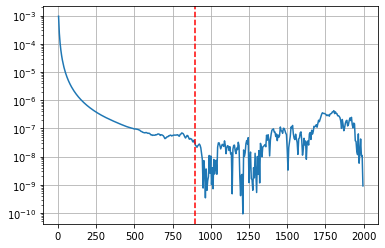

In [17]:
plt.semilogy(np.arange(5,2000,5), errors)
plt.axvline(900, color='red', linestyle='--')
plt.grid()

In [18]:
print('Optimal h:', L/900)

Optimal h: 0.0002777777777777778


---

### Problem 2 (30pt)

Let all parameters be the same as in Problem 1 except for $H(x) = (3 − 2x/L)(2 + \cos(18πx/L)) · 6\, \text{mm}$.

* **(5pt)** Formulate the corresponding finite difference problem.


* **(10pt)** Write the corresponding code.


* **(10pt)** Assuming that the beam fractures at the point where the modulus of the quantity $\sigma(x) = u''(x)H(x)$ is largest, find the point where the beam should fracture. Give details on how you compute it (e.g., what value of h you used).


* **(5pt)** Give an example of a smooth function $~H = H(x)$, satisfying $~3\, \text{mm} \leq H \leq 15\, \text{mm}~$ everywhere, such that the beam fractures at $~x \approx L/3$.


---

## Solution of Problem 2

* **(5pt)** Formulate the corresponding finite difference problem.


<center>Eq. 1 of system 1  can be written down as $(f(x))'' = 0$.</center>

&ensp;

$$f(x) = EI(x)u''(x)$$

To approximate it we use the formulas below:

$$
(f(x))'' = \frac{f(x + h) - 2f(x) + f(x - h)}{h^2}
$$

$$
f(x + h) = EI(x + h)u''(x + h) = EI(x + h)\frac{u(x + 2h) - 2u(x + h) + u(x)}{h^2}
$$

$$
f(x) = EI(x)u''(x) = EI(x)\frac{u(x + h) - 2u(x) + u(x - h)}{h^2}
$$

$$
f(x - h) = EI(x - h)u''(x - h) = EI(x -h)\frac{u(x) - 2u(x - h) + u(x - 2h)}{h^2}
$$


Let's finally derive this:

$$
 (EI(x)u'')'' = I(x + h)(u(x + 2h) - 2u(x + h) + u(x)) - 2I(x)(u(x + h)\\
 - 2u(x) + u(x - h)) + I(x -h)(u(x) - 2u(x - h) + u(x - 2h)) = 
$$

$$
= u(x + 2h) I(x + h) + u(x + h) (-2I(x + h) - 2I(x)) + u(x)(I(x + h) + 4I(x)\\ + I(x - h)) + u(x - h) (-2I(x) -2I(x - h)) + u(x -2h)I(x -h) = 0
$$


Boundary conditions (eq. 2-3):

$$
u(0) = u(x_0) = u_0  = 0
$$

$$
u'(0) = \frac{u(x_1) - u(x_{-1})}{2h} + O(h^2)  = 0
$$
$$
u_1 - u_{-1}  = 0
$$

$$
u''(L) = u_{N + 1} − 2u_N + u_{N - 1}= 0
$$


The last BC (eq. 4 in system 1) should be approximated as:
$$
(EIu'')'(L)=P 
$$

$$
\frac{EI(L+h)u''(L+h) - EI(L-h)u''(L-h)}{2h} = \frac{EI(L+h)(u(L+2h) - 2u(L+h) + u(L)) - EI(L-h)(u(L-2h) - 2u(L-h) + u(L)) }{2h^3} = E\frac{u(L + 2h) I(L+h) -2u(L+h)I(L+h) + u(L)(I(L+h) - I(L-h)) + 2u(L-h)I(L-h) - u(L-h)I(L-h)}{2h^3} = P
$$

In matrix form the whole system is written as:

$$
\begin{pmatrix}
I(0) & -2(I(0) + I(1)) & I(0) + 4I(1) + I(2) & -2(I(1) + I(2)) & I(2) & 0 & \ldots \\
0 & I(1) & -2(I(1) + I(2)) & I(1) + 4I(2) + I(3) & 2(I(2) + I(3)) & I(3) & \ldots \\
    &&&&&\ddots\\
    &&&&&\ldots & I(N) & -2(I(N) + I(N + 1)) & I(N) + 4I(N + 1) + I(N+2) & 2(I(N + 1) + I(N+2)) & I(N+2)\\
0 & 1 & 0 & \ldots \\
-1 & 0& 1 & \ldots \\
&&&&&\ldots & 0 & 1 & -2 & 1 & 0 \\
&&&&&\ldots & -I(N-1) & 2I(N-1) & (I(N+1) - I(N-1)) & -2I(N+1) & I(N+1) \\
\end{pmatrix} \begin{pmatrix}u_{-1} \\ u_{0} \\ \vdots \\ u_{N + 1} \\ u_{N + 2}  \end{pmatrix} = \begin{pmatrix}0 \\ 0 \\ \vdots \\ 0 \\0 \\ 0 \\ 0 \\ \frac{2h^3P}{E}  \end{pmatrix}
$$

---

* **(10pt)** Write the corresponding code.

In [19]:
def create_A(num_points, L, const=False):
    A = np.zeros((num_points+4,num_points+4))
    # Fullfill the matrix
    I = create_I(num_points,L, W, const)
    A[0][0], A[0][2] = 1, -1
    A[1][1] = 1
    A[-2][-2],A[-2][-3],A[-2][-4] = 1,-2,1
    A[-1][-1], A[-1][-2], A[-1][-3], A[-1][-4], A[-1][-5] = I[-2], (-2*I[-2]), (I[-2]-I[-4]), 2*I[-4], (-I[-4])
    for k in range(2,N+2):
        A[k][k+2] = I[k+1]
        A[k][k+1] = -2*(I[k+1] + I[k])
        A[k][k] = I[k+1] + 4*I[k] + I[k-1]
        A[k][k-1] = -2*(I[k-1]+I[k])
        A[k][k-2] = I[k-1]
    return A


def create_b(num_points, L, E, m, g):
    h = L/N
    b = np.zeros(num_points+4)
    b[-1] = 2*h**3*m*g/E
    return b


def create_H (N,L):
    h = L/N
    x = np.arange((-h),(L+3*h),h)
    return 0.006*(3-2*x/L)*(2+np.cos(18*np.pi*x/L))

def create_I(N,L,W, const=False):
    if const:
        return np.full(N+4, W *0.007 ** 3 / 12)
    else:
        return W *create_H(N,L) ** 3 / 12

In [26]:
E = 2.5 * 10**9
H = 7 * 10**(-3)
W = 3 * 10**(-3)
L = 0.25
m = 0.2
g = 9.81 

N = 900
h = L/N
x = np.arange((-h),(L+3*h),h)

A_nonconst = create_A(N, L)

# Test for convergence with previous results
A = create_A(N,L, const=True)


b = create_b(N, L, E, m, g)


u_nonconst = np.linalg.solve(A_nonconst,b)

# Test for convergence with previous results
u = np.linalg.solve(A,b)

To check the correctness of the code we should put in $H = 7 \cdot 10^{-3}$. The results of corresponding code should converge to previous results.

In [27]:
print('Computed deflection on the right end:', u[-3], 'm')
print('Computed deflection on the right via analytical function:', u_L_analytical, 'm')
print('Computed deflection on the right end with H(x):', u_nonconst[-3], 'm')

Computed deflection on the right end: -0.047666927349420365 m
Computed deflection on the right via analytical function: -0.047667638483965026 m
Computed deflection on the right end with H(x): -0.0017187810816109129 m


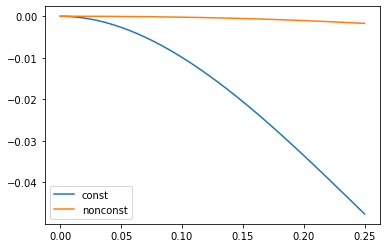

In [28]:
plt.plot(x[1:-3], u[1:-3])
plt.plot(x[1:-3], u_nonconst[1:-3])
plt.legend(['const','nonconst'])

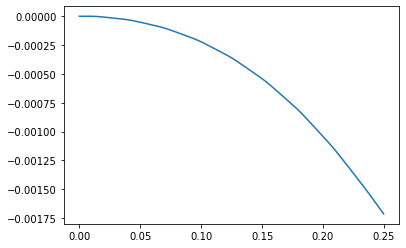

In [29]:
# plt.plot(x[1:-3], u[1:-3])
plt.plot(x[1:-3], u_nonconst[1:-3])
# plt.legend(['const','nonconst'])

---

* **(10pt)** Assuming that the beam fractures at the point where the modulus of the quantity $\sigma(x) = u''(x)H(x)$ is largest, find the point where the beam should fracture. Give details on how you compute it (e.g., what value of h you used).


Remember the approximation of second derivative from item 1 of bullet list:
$$
(f(x))'' = \frac{f(x + h) - 2f(x) + f(x - h)}{h^2}
$$

As a result:

$$\sigma(x) = \frac{u(x + h) - 2u(x) + u(x - h)}{h^2}H(x)$$

In [30]:
sigma = (u_nonconst[2:-2] - 2*u_nonconst[1:-3] + u_nonconst[:-4])*create_H(N,L)[1:-3]/h**2

Text(0, 0.5, '$\\sigma(x)$')

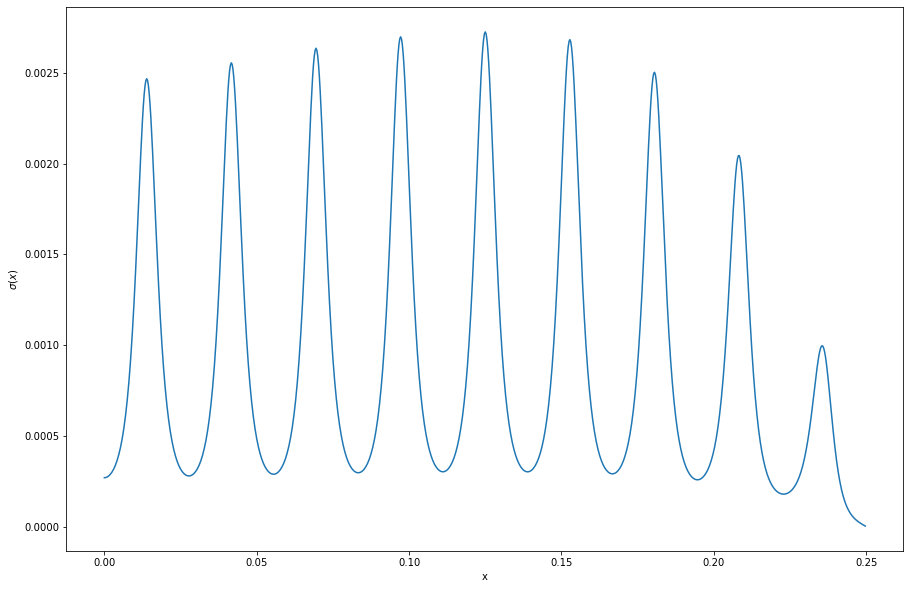

In [31]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(x[1:-3], np.abs(sigma))
ax.set_xlabel('x')
ax.set_ylabel('$\sigma(x)$')

In [32]:
print("Number of computation points = %i" % N)
print("Fracture point = %f" % np.argmax(np.abs(sigma)))

Number of computation points = 900
Fracture point = 450.000000


### The beam fractures exactly in the middle

---

* **(5pt)** Give an example of a smooth function $~H = H(x)$, satisfying $~3\, \text{mm} \leq H \leq 15\, \text{mm}~$ everywhere, such that the beam fractures at $~x \approx L/3$.

In [53]:
def create_H(N,L):
    h = L/N
    x = np.arange((-h),(L+3*h),h)
    return 0.02 -0.015 * np.exp(-(x-L/2.393) **2 / (0.04))

In [56]:
N = 900
h = L/N
x = np.arange((-h),(L+3*h),h)

A_nonconst = create_A(N, L)
b = create_b(N, L, E, m, g)

u_nonconst = np.linalg.solve(A_nonconst,b)
H = create_H(N,L)
sigma = (u_nonconst[2:-2] - 2*u_nonconst[1:-3] + u_nonconst[:-4])*H[1:-3]/h**2

Text(0, 0.5, '$\\sigma(x)$')

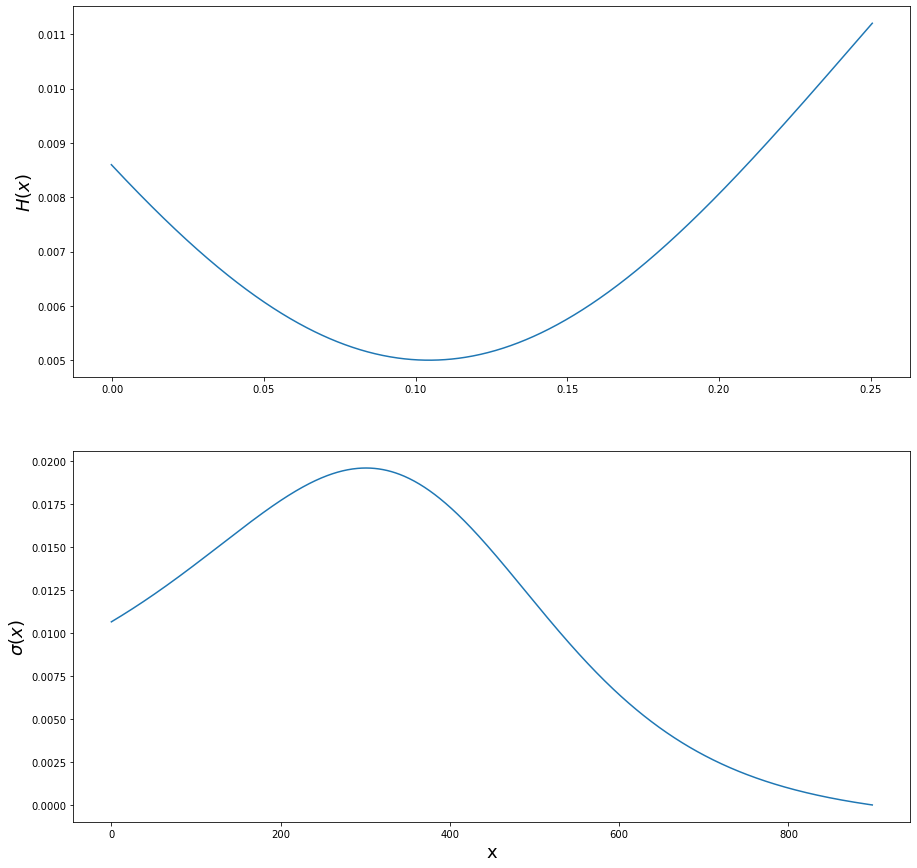

In [57]:
fig, axes = plt.subplots(2, 1, figsize=(15, 15))
axes[0].plot(x, H)
axes[0].set_ylabel('$H(x)$', fontsize=18)
axes[1].plot(np.abs(sigma))
axes[1].set_xlabel('x', fontsize=18)
axes[1].set_ylabel('$\sigma(x)$', fontsize=18)

In [59]:
print(f'Minimum H(x) {np.min(H) * 10**3} mm, maximum H(x) {np.max(H) * 10**3} mm')

Minimum H(x) 5.000000271967391 mm, maximum H(x) 11.201902501639466 mm


In [60]:
max_idx = np.argmax(np.abs(sigma))

In [61]:
print(f'Fracture point: {x[max_idx]}, third of beam length: {L / 3}')

Fracture point: 0.08333333333333333, third of beam length: 0.08333333333333333


Check if this $H(x)$ satisfies to Problem 3 criteria:
* The beam fractures at the point where $\sigma(x)$ is largest  - Yes
* The total material is fixed: $\int_{0}^L H(x) dx = 2000\, \text{mm}^2$  - Let's check
* $3\, \text{mm} \leq H \leq 15\, \text{mm}$ - Yes

In [62]:
np.trapz(create_H(N,L))

6.196435774117484

The answer is no, the beam is too thick for satistying the conditions

---

### Problem 4 (30pt)

Interpolate the following function:
$$f(x) = \frac{1}{1+25 x^2}$$
for $x \in [-1, 1]$ by the following methods.

* (a) On an equidistant (uniform) grid for piecewise constant and piecewise linear interpolation. 
* (b) Polynomial interpolation on a uniform grid (i.e., equidistant points)
* (c) A Chebyshev grid (i.e., when the interpolation points are the roots of Chebyshev polynomials).

Calculate the interpolation error as the number of points increases (or the grid resolution $h$ decreases). How does the interpolation error depend on the grid resolution (what is the order of convergence)? Plot this dependence on a logarithmic scale and comment on the results.

### Solution of Problem 4

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import KroghInterpolator

def piecewise_constant(x, grid, fi):
    idx = np.searchsorted(x, grid)
#     print(idx)
    return fi[idx - 1]

def piecewise_linear(x, grid, fi):
    idx = np.searchsorted(x, grid) - 1
    a = (fi[idx + 1] - fi[idx]) / (x[idx + 1] - x[idx])
    b = (fi[idx]*x[idx + 1] - fi[idx + 1]*x[idx]) / (x[idx + 1] - x[idx])
    return a*grid + b


def polynomial(x, grid, fi):
    denom = x.reshape((-1, 1)) - x.reshape((1, -1))
    denom[np.arange(len(denom)), np.arange(len(denom))] = 1.0
    denom = np.prod(denom, axis=1)

    grid = grid.reshape((-1, 1, 1))
    numer = np.repeat(grid - x, len(x), axis=1)
    numer[:, np.arange(numer.shape[1]), np.arange(numer.shape[2])] = 1.0
    numer = np.prod(numer, axis=2)
    return np.sum(numer / denom * fi, axis=1)


def f(x):
    return 1 / (1 + 25 * x**2)

In [66]:
N = 50
scale = 100
x = np.linspace(-1, 1, N)
cheb_x = np.cos((2 * np.arange(1, N + 1)  - 1) / (2 * N) * np.pi)
grid = np.linspace(-1, 1, scale*N)
fi = f(x)
p_c = piecewise_constant(x, grid, fi),
p_l = piecewise_linear(x, grid, fi),
pol = polynomial(x, grid, fi),
pol_ch = polynomial(cheb_x, grid, fi),

# titles = ['Piecewise constant', 'Piecewise linear', 'Polynomial on equdistant', 'Polynomial on Chebyshev']

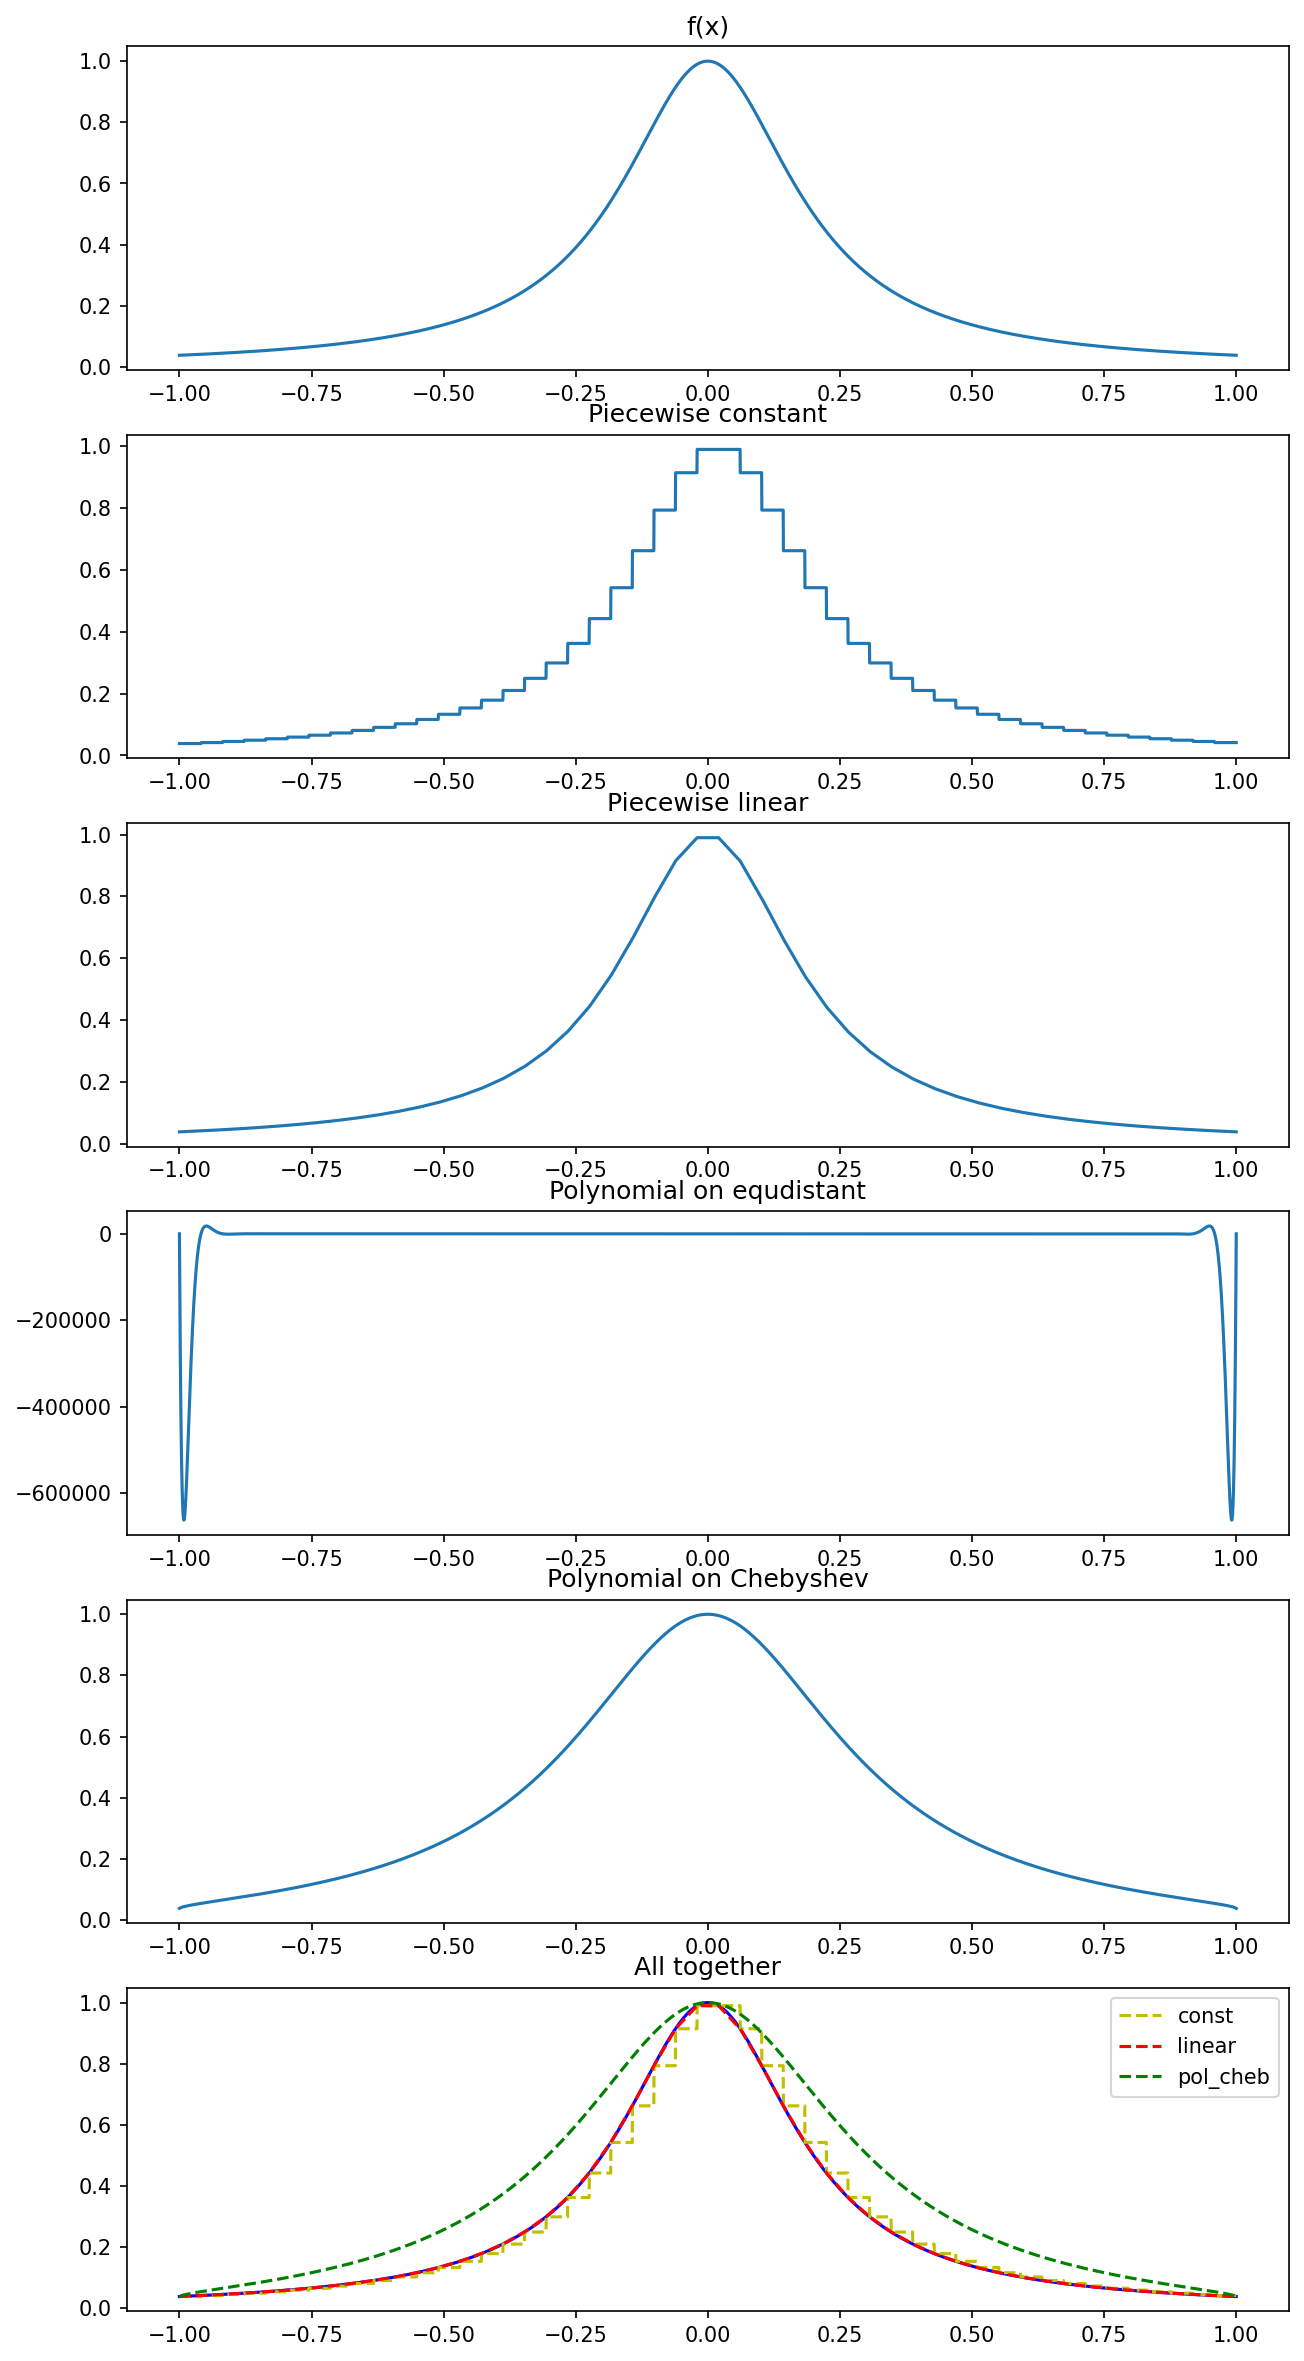

In [67]:
fig, axes = plt.subplots(6, 1, figsize=(10, 20), dpi=150)
axes[0].plot(grid, f(grid))
axes[0].set_title('f(x)')
axes[1].plot(grid, p_c[0])
axes[1].set_title('Piecewise constant')
axes[2].plot(grid, p_l[0])
axes[2].set_title('Piecewise linear')
axes[3].plot(grid, pol[0])
axes[3].set_title('Polynomial on equdistant')
axes[4].plot(grid, pol_ch[0])
axes[4].set_title('Polynomial on Chebyshev')


axes[5].set_title('All together')
axes[5].plot(grid, f(grid), color='b')
axes[5].plot(grid, p_c[0], '--', color='y', label='const')
axes[5].plot(grid, p_l[0], '--', color='r', label='linear')
# axes[5].plot(grid, pol[0], '--', color='b', label='pol')
axes[5].plot(grid, pol_ch[0], '--', color='g', label='pol_cheb')
axes[5].legend()

In [68]:
titles = ['Piecewise constant', 'Piecewise linear', 'Polynomial on equdistant', 'Polynomial on Chebyshev']

num_points_range = list(np.arange(3, 150))
num_points_range.sort()
scale = 50



errors = [[] for _ in range(len(titles))]
for num_points in num_points_range:
    x = np.linspace(-1, 1, num_points)
    grid = np.linspace(-1, 1, scale*num_points)
    cheb_x = np.cos((2 * np.arange(1, num_points + 1)  - 1) / (2 * num_points) * np.pi)
    fi = f(x)
    p_c = piecewise_constant(x, grid, fi),
    p_l = piecewise_linear(x, grid, fi),
    pol = polynomial(x, grid, fi),
    pol_ch = polynomial(cheb_x, grid, fi),
    real_val = f(grid)
    
    errors[0].append(np.max(np.abs(real_val - p_c)))
    errors[1].append(np.max(np.abs(real_val - p_l)))
    errors[2].append(np.max(np.abs(real_val - pol)))
    errors[3].append(np.max(np.abs(real_val - pol_ch)))

Text(0, 0.5, 'Error')

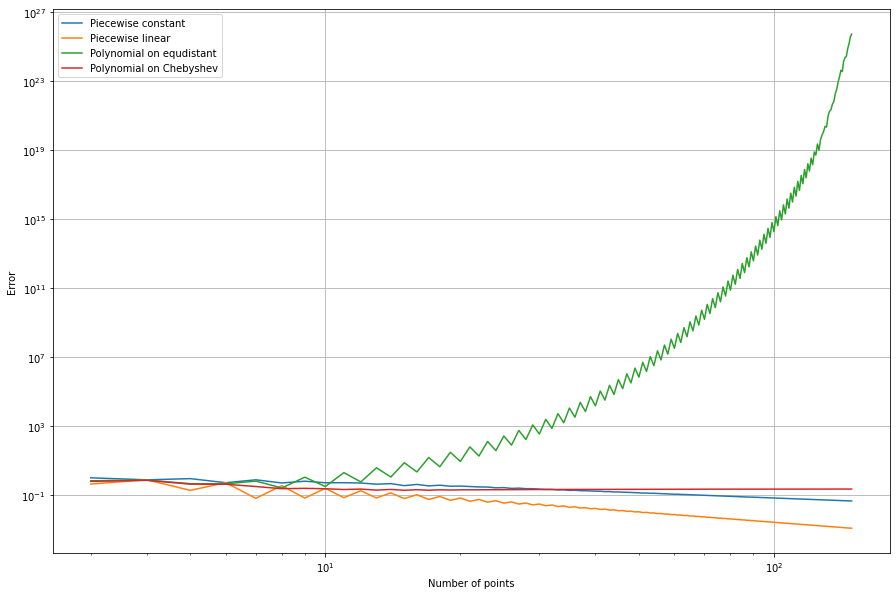

In [69]:
fig, ax = plt.subplots(figsize=(15, 10))
for i, error in enumerate(errors):
    ax.loglog(num_points_range, error, label=titles[i])
ax.legend()
ax.grid()
ax.set_xlabel('Number of points')
ax.set_ylabel('Error')